ECE 447: Matrix Exponentials
===
In  which we solve linear ODEs once and for all.

Prof. Eric Klavins

&copy; 2019, University of Washington

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from sympy import *
init_printing(use_latex='mathjax')
%matplotlib inline

The General Solution to $\dot x = Ax$
===

When $A \in \mathbb{R}^{n\times n}$, then the we define $e^{At}$ by

$$
e^{At} \triangleq I + At + \frac{(At)^2}{2!} + \frac{(At)^3}{3!} + \dots
$$

It turns out that 

$$
x(t) = e^{At}x(0)
$$

is the solution to $\dot x = Ax$. This is because

\begin{align}
\frac{d}{dt}e^{At}x(0) & = 
\frac{d}{dt}\left(I + At + \frac{(At)^2}{2!} + \frac{(At)^3}{3!} + \dots\right)x(0) \\
 & = \left(0 + A + A^2 t + \frac{A^3t^2}{2!} + \dots\right)x(0) \\
 & = A \left(I + A + + \frac{(At)^2}{2!} + \dots \right)x(0) \\
 &= A e^{At} x(0) \\
 & = A x(t).
\end{align}

We next explore what $e^{At}$ looks like for various types of matrices.

Diagonalizable Matrices
===

If $A$ is diagonalizable, then $A = P D P^{-1}$ for some $P$ and $D$. In this case,

\begin{align}
e^{At} & = e^{PDP^{-1}t} \\
       & = I + PDP^{-1}t + \frac{(PDP^{-1}t)^2}{2!} + \dots \\
       & = I + PDP^{-1}t + \frac{PDP^{-1}PDP^{-1}t^2}{2!} + \dots \\
       & = I + PDP^{-1}t + \frac{PD^2P^{-1}t^2}{2!} + \dots \\
       & = P \left(I + Dt + \frac{D^2t^2}{2!} + \dots \right)P^{-1} \\
       & = P e^{Dt} P^{-1}.
\end{align}

Now, since $D$ is diagonal and of the form

$$
D = \begin{pmatrix}
\lambda_1 & 0 \\
0 & \lambda_2
\end{pmatrix}
$$

it is clear that 

$$
e^{Dt} = \begin{pmatrix}
e^{\lambda_1t} & 0 \\
0 & e^{\lambda_2t}
\end{pmatrix} .
$$

Thus, figuring out $e^{At}$ is just matrix multiplication using $P e^{Dt} P^{-1}$.

<span style="color: darkorange; border: 1pt solid darkorange; padding: 8px">
**NOTE**: In general, $e^{At}$ is **not** just the elementwise exponentials of the entries of $A$. 
</span>

Example: Real Eigenvalues
---

In [2]:
# Compute e^{At} using diagonalization method
var("t")
A = Matrix([[-2,-2],[-1,-3]])
P,D = A.diagonalize()
pprint(D)
eDt = Matrix([
    [exp(D[0,0]*t), 0], 
    [0, exp(D[1,1]*t)]
])
eAt = P*eDt*P.inv()
eAt.simplify()
eAt

⎡-4  0 ⎤
⎢      ⎥
⎣0   -1⎦


⎡⎛   3⋅t    ⎞  -4⋅t  ⎛     3⋅t    ⎞  -4⋅t⎤
⎢⎝2⋅ℯ    + 1⎠⋅ℯ      ⎝- 2⋅ℯ    + 2⎠⋅ℯ    ⎥
⎢──────────────────  ────────────────────⎥
⎢        3                    3          ⎥
⎢                                        ⎥
⎢⎛   3⋅t    ⎞  -4⋅t    ⎛ 3⋅t    ⎞  -4⋅t  ⎥
⎢⎝- ℯ    + 1⎠⋅ℯ        ⎝ℯ    + 2⎠⋅ℯ      ⎥
⎢──────────────────    ────────────────  ⎥
⎣        3                    3          ⎦

In [3]:
# Compute e^{At} using sympy's exp which, works on 
# matrices and probably does the same thing
exp(A*t)

⎡   -t    -4⋅t       -t      -4⋅t⎤
⎢2⋅ℯ     ℯ        2⋅ℯ     2⋅ℯ    ⎥
⎢───── + ─────  - ───── + ───────⎥
⎢  3       3        3        3   ⎥
⎢                                ⎥
⎢   -t    -4⋅t     -t      -4⋅t  ⎥
⎢  ℯ     ℯ        ℯ     2⋅ℯ      ⎥
⎢- ─── + ─────    ─── + ───────  ⎥
⎣   3      3       3       3     ⎦

In [4]:
# Find the solution to x' = Ax when x(0) = (1,-2)
x = eAt*Matrix([1,-2])
x.simplify()
x

⎡     -t    -4⋅t  ⎤
⎢  2⋅ℯ   - ℯ      ⎥
⎢                 ⎥
⎢ ⎛ 3⋅t    ⎞  -4⋅t⎥
⎣-⎝ℯ    + 1⎠⋅ℯ    ⎦

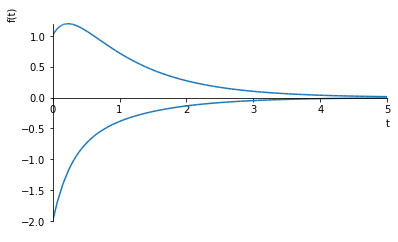

In [5]:
# Note, we are using sympy's plotting.plot method, and not numpy's method
plotting.plot(x[0],x[1],(t,0,5));

Sympy's symbols cannot be used with numpy.plt directly. First, you have to convert them into functions. To do this, you use `lambdify`. For example, to turn the expression $e^{-t}$ into a function that numpy can use, you do

In [6]:
f = lambdify(t,exp(-t), modules=['numpy'])

You can now evaluate f for any t. For example:

In [7]:
print(f(0))
print(f(1))
print(f(2))

1.0
0.367879441171
0.135335283237


So, to plot the above solution to $\dot x = Ax$, we can do the following:

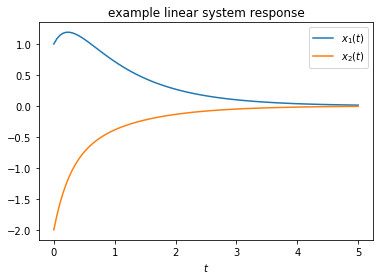

In [8]:
# Using numpy. 

# First, turn xt into functions
x = lambdify(t,x, modules=['numpy'])

# then plot
tvals = np.linspace(0,5,100)
plt.plot(tvals,x(tvals)[0,0], label="$x_1(t)$")
plt.plot(tvals,x(tvals)[1,0], label="$x_2(t)$")
plt.xlabel("$t$")
plt.title("example linear system response")
plt.legend();

Example: Imaginary Eigenvalues
---
As another example, consider a matrix with complex eigenvalues. This can be diagonalized, you just don't get a real matrix. 

In [9]:
A = Matrix([[-1,1],[-1,-1]])
P,D = A.diagonalize()
D

⎡-1 - ⅈ    0   ⎤
⎢              ⎥
⎣  0     -1 + ⅈ⎦

In [10]:
P

⎡ⅈ  -ⅈ⎤
⎢     ⎥
⎣1  1 ⎦

In [11]:
eAt=P*exp(D*t)*P.inv()
eAt

⎡    t⋅(-1 - ⅈ)    t⋅(-1 + ⅈ)        t⋅(-1 - ⅈ)      t⋅(-1 + ⅈ)⎤
⎢   ℯ             ℯ               ⅈ⋅ℯ             ⅈ⋅ℯ          ⎥
⎢   ─────────── + ───────────     ───────────── - ─────────────⎥
⎢        2             2                2               2      ⎥
⎢                                                              ⎥
⎢     t⋅(-1 - ⅈ)      t⋅(-1 + ⅈ)     t⋅(-1 - ⅈ)    t⋅(-1 + ⅈ)  ⎥
⎢  ⅈ⋅ℯ             ⅈ⋅ℯ              ℯ             ℯ            ⎥
⎢- ───────────── + ─────────────    ─────────── + ───────────  ⎥
⎣        2               2               2             2       ⎦

In [12]:
eAt = eAt.simplify() # Uses cos(t) = (e^{it} + e^{-it})/2
eAt

⎡ -t           -t       ⎤
⎢ℯ  ⋅cos(t)   ℯ  ⋅sin(t)⎥
⎢                       ⎥
⎢  -t          -t       ⎥
⎣-ℯ  ⋅sin(t)  ℯ  ⋅cos(t)⎦

In [13]:
x = eAt*Matrix([1,-2])
x.simplify()

⎡                      -t⎤
⎢(-2⋅sin(t) + cos(t))⋅ℯ  ⎥
⎢                        ⎥
⎢                      -t⎥
⎣-(sin(t) + 2⋅cos(t))⋅ℯ  ⎦

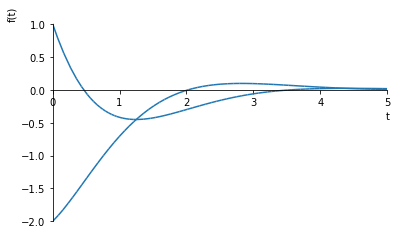

In [14]:
plotting.plot(x[0],x[1],(t,0,5));